# 2950 Project Phase IV

# Introduction

What is the context of the work? What research question are you trying to answer? What are your main findings? Include a brief summary of your results.<br>

This project aims to analyze a dataset of data from the Global Health Observatory (GHO) data repository under the World Health Organization (WHO) and the United Nations. Together, these organizations track health, economic, and social factors for all countries.<br>

Our two research questions are:<br>
1. How does the average education level of a country affect the country's holistic health?
2. How does a country's government spending play into the the average life expectancy of its citizens?

Our main findings include:
- a strong exponential decay relationship between the percent of citizens with HIV or AIDs and average years of schooling
- percentage expenditure on health, income composition of resources, and gdp as strong predictors of life expectancy in a multiple linear regression
- a single linear regression between income composition of resources and schooling which high correlation

# Data Description
**What are the observations (rows) and the attributes (columns)?**

The rows of the data set are countries and the columns of the data set are: country (country name), year (year this data was collected), status (developed or developing country), life_expectancy (average life expectancy in age), adult_mortality (probability of dying between 15 and 60 years per 1000 population), infant_deaths (number of infant deaths per 1000 population), alcohol (alcohol consumption recorded per capita (in litres of pure alcohol)), percent_expenditure (expenditure on health as a percentage of GDP per capita), hepitatis_b (Hepatitis B immunization coverage among 1-year-olds as a percentage), measles (number of reported cases per 1000 population), BMI (average Body Mass Index), under_five_deaths (number of under-five deaths per 1000 population), polio (Polio immunization coverage among 1-year-olds as a percentage), total_expenditure (general government expenditure on health as a percentage of total government expenditure), diphtheria (diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds as a percentage), hiv/aids (deaths per 1000 live births (0-4 years)), gdp (Gross Domestic Product per capita (in USD)), population, thinness__1-19_years (prevalence of thinness among children and adolescents for ages 10 to 19 as a percentage), thinness_5-9_years (prevalence of thinness among children for age 5 to 9 as a percentage), income_composition_of_resources (Human Development Index in terms of income composition of resources (index ranging from 0 to 1)), schooling (average number of years of schooling).

**Why was this data set created?**

Both the Global Health Observatory (GHO) data repository under the World Health Organization (WHO) and the United Nations track health statistics as well as many other related factors (economic, social, etc.) for all countries. The creators of this data set combined the data from the repository with that of the UN. They observed that in the past 15 years, there have been significant developments in the health sector specifically in terms of decreasing human mortality rates. They created this data set to compare this decreasing mortality rate to a number of other economic, social, and medical factors to analyze how they contribute.

**Who funded the creation of the data set?**

This project was funded by the Industrial Engineering Department at Georgia Institute of Technology.

**What processes might have influenced what data was observed and recorded and what was not?**

In terms of the WHO collecting data, it is possible that more developed countries have more resources and are thus more likely to have more data. With this said, in order to compare each country equitably, the data collectors must collect the same data across all countries. This means that it is possible that the data collection was limited by what data variables were available across every country.

In terms of the creation of the actual data set, the creators mentioned a few factors they used to limit the data set: The creators of this data set noted that there were certain countries originally in this data set that had lots of missing data (they noted lesser known countries like Vanuatu, Tonga, Togo, Cabo Verde etc.). They shared that finding the data for these countries was difficult, so they decided to exclude the countries from the final data set of 193 countries. The creators also noted that “among all categories of health-related factors only those critical factors were chosen which are more representative”. This means that they omitted other factors that they deemed less important or less correlated to the data set.

How they data cleaned: Of all health related categories in the WHO data set, only the critical factors (those with high correlations to mortality rates) were chosen to be included. The creators combined these data sets for the years 2000-2015 for 193 countries using the merge function. To account for the missing values, the developers handled it in R software by using the Missmap command.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The preprocessing done by the creators of the data set are outlined in two questions above. The preprocessing we did was outlined in the jupyter notebook data cleaning file.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

The WHO notes that all of their data sets "represent the best estimates using methodologies for specific indicators that aim for comparability across countries and time; they are updated as more recent or revised data become available, or when there are changes to the methodology being used". The people involved in the data collection are aware of their data being collected and understand the WHOs intent to utilize their data to analyze global health trends to serve the greater health of humanity.

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**

https://drive.google.com/file/d/1uWotsPMAGiU_x2lEgssgJe6DtITk4r1I/view?usp=sharing


# Pre-Registration Statement
The two analyses we would like to preregister are:

1. Single exponential decay regression with HIV/AIDS to predict average years of schooling
2. Multiple linear regression with percentage expenditure, income composition of resources, and GDP on life expectancy

# Summary Analysis

Printed below is a random sample of the cleaned dataset.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from   sklearn.linear_model import LogisticRegression, LinearRegression
df = pd.read_csv('WHOcleaner.csv')
df.sample(10)

,country,status,life_expectancy,adult_mortality,percentage_expenditure,bmi,hiv/aids,gdp,income_composition_of_resources,schooling
4,Antigua and Barbuda,0.0,75.05625,127.5000,1001.585226,38.42500,0.1250,9759.305728,0.488625,8.84375
91,Mauritania,0.0,62.80000,159.9375,31.703147,22.47500,1.1875,635.049609,0.473062,7.31875
139,Thailand,0.0,73.08125,160.3750,401.259963,21.59375,0.3875,3494.781702,0.694688,12.55000
84,Luxembourg,1.0,80.78125,67.5625,8177.576341,47.82500,0.1000,53257.012741,0.878125,13.63750
22,Bulgaria,1.0,72.85000,125.5000,350.745204,54.50000,0.1000,4938.981821,0.754625,13.72500
69,Israel,0.0,81.30000,59.5000,1467.535827,54.98750,0.1000,18860.476016,0.873188,15.71250
27,Cameroon,0.0,54.01875,294.8750,44.462300,23.61875,6.2125,781.016004,0.470000,8.90625
102,New Zealand,1.0,81.33750,71.5000,2922.147780,56.62500,0.1000,14775.554807,0.891188,18.86875
111,Paraguay,0.0,73.11250,139.9375,229.790694,39.52500,0.1375,1983.404335,0.656188,12.16875
28,Canada,0.0,81.68750,64.6250,4694.078971,55.86250,0.1000,29382.907523,0.892188,15.87500


We found the mean of life expectancy and adult mortality overall, as well as for developed vs. developing countries. To reiterate, developing countries have a status value of 0.0 and developed countries have a status value of 1.0.

In [2]:
print(f"The average life expectancy is{df.life_expectancy.mean(): 0.4f}.")
df.groupby('status').mean()[['life_expectancy']]

The average life expectancy is 69.4729.


,life_expectancy
status,
0.0,67.278248
1.0,79.427009


In [3]:
print(f"The average adult mortality is{df.adult_mortality.mean(): 0.4f}.")
df.groupby('status').mean()[['adult_mortality']]

The average adult mortality is 160.8806.


,adult_mortality
status,
0.0,178.779528
1.0,79.696429


We also were curious to determine the ratio of developing countries to developed countries.

In [4]:
df.value_counts(subset=df.status)

status
0.0    127
1.0     28
dtype: int64

# Data Analysis

**Exponential Decay Regression: HIV/AIDs and Schooling**

Coefficient:-0.0139.
Intercept: 2.4850.
r^2: 0.0528.


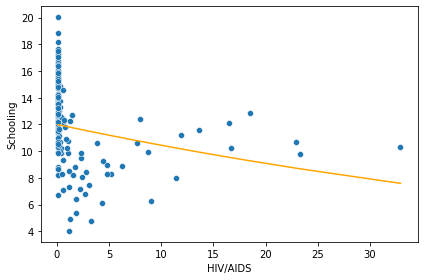

In [5]:
#transform output variable
x='hiv/aids'
y= 'schooling'
log_y = np.log(df[y])
pred= []
cleaned_pred= []

#relationship
model = LinearRegression().fit(df[[x]], log_y)
pred.append(np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x]))
y_pred = np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x])
cleaned_pred.append(y_pred)

#graph
plt.figure()
sns.scatterplot(data=df, y="schooling", x='hiv/aids')
indices = np.argsort(df[x].values)
plt.plot(df[x].values[indices], cleaned_pred[0][indices], c='orange')
plt.ylabel('Schooling')
plt.xlabel('HIV/AIDS')
plt.tight_layout()
print(f"Coefficient:{model.coef_[0]: 0.4f}.")
print(f"Intercept:{model.intercept_: 0.4f}.")
print(f"r^2:{model.score(df[[x]], log_y): 0.4f}.")

We originally preregistered that we think HIV/AIDs could predict schooling with an exponential decay model. After running this model and graphic it above, we notice that it seems a bit off. Reflecting on our previous thoughts, we realize that we were thinking more along the lines of the inverse relationship, where the amount of schooling predicts the prevelance of HIV/AIDs in a country with a exponential decay model. Thus, to see if this is true, we will run the same model with the x and y axes flipped below.

Coefficient:-0.3130.
Intercept: 2.6674.
r^2: 0.3418.


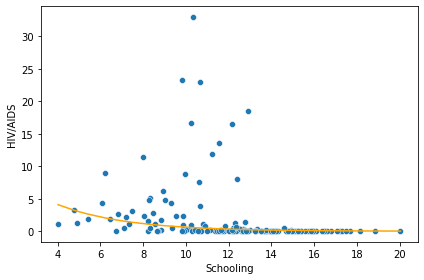

In [6]:
#transform output variable
y='hiv/aids'
x='schooling'
log_y = np.log(df[y])
pred= []
cleaned_pred= []

#relationship
model = LinearRegression().fit(df[[x]], log_y)
pred.append(np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x]))
y_pred = np.exp(model.intercept_) * np.exp(model.coef_[0] * df[x])
cleaned_pred.append(y_pred)

#graph
plt.figure()
sns.scatterplot(data=df, x="schooling", y='hiv/aids')
indices = np.argsort(df[x].values)
plt.plot(df[x].values[indices], cleaned_pred[0][indices], c='orange')
plt.xlabel('Schooling')
plt.ylabel('HIV/AIDS')
plt.tight_layout()
print(f"Coefficient:{model.coef_[0]: 0.4f}.")
print(f"Intercept:{model.intercept_: 0.4f}.")
print(f"r^2:{model.score(df[[x]], log_y): 0.4f}.")

**Interpretation and Conclusions:**

As seen above, this inversion of the axes definitely fits the exponential decay model more. However, the model does not seem too predictive. The r-squared value of 0.3418 is relatively low, implying that this model is not a great way to accurately predict HIV/AIDs rates from schooling years. 

After graphing the scatter plot and model line above, it appears that there is a lot of data near the center of the schooling axis that has a lot high rates of HIV/AIDs, even more so than countries that have the lowest amounts of schooling. This data has an interesting plot, but does not seem to accurately fit the exponential decay model. Countries with many years of schooling have an HIV/AIDs rate that approaches 0.00, following the exponential decay model. However, majority of the countries with less than 14 years of schooling have HIV/AIDs rates that are understated by the model compared to the actual values. 

Overall, our original hypothesis that schooling has a high predictive value for HIV/AIDs seems to be inconclusive, as the exponential decay model did not fit as well as intended, and the scatterplot has an interesting shape that likely would not match other models as well.

# Single Linear Regression: Income Composition of Resources

Based off the previous model of HIV/AIDs, we cannot predict much from average amount of schooling, but since schooling has such a high correlation to life expectancy in this data set as we found in phase ii, we want to explore it more. Specifically, comparing schooling to income composition of resources is particularly interesting. Both income composition of resources and schooling had high correlations with life expectancy, so we suspect these variables have a linear relationship. If there is a positive linear relationship, since income composition of resources relates to how efficiently a country uses its resources, this would mean that schooling is a very efficient and effective way for governments to spend money.

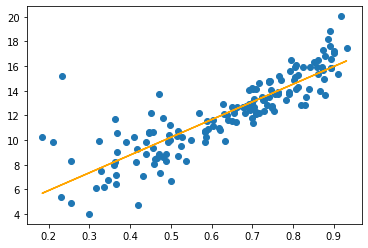

r^2:  0.7395.


In [7]:
school_model = LinearRegression()
school_model.fit(df[['income_composition_of_resources']], df['schooling'])
plt.scatter(df.income_composition_of_resources, df.schooling)
plt.plot(df.income_composition_of_resources, school_model.predict(df[['income_composition_of_resources']]), c='orange')
plt.show()
print(f"r^2: {school_model.score(df[['income_composition_of_resources']], df['schooling']): 0.4f}.")

**Interpretation and Conclusions:**

As seen above, the scatterplot closely fits a linear regression model and has a very high coefficient of determination of 0.7395. This means that as income composition of resources increases, there is a high predictive chance that a country has higher amounts of schooling. Essentially, if a country is efficiently spending their money, they also likely have a high average years of schooling.

**Multiple Linear Regression: percentage expenditure on health, income composition of resources, and gdp as predictors of life expectancy**

In [8]:
multireg= LinearRegression().fit(df[["percentage_expenditure", "income_composition_of_resources", "gdp"]], df["life_expectancy"])
multi= multireg.score(df[["percentage_expenditure", "income_composition_of_resources", "gdp"]], df["life_expectancy"])
print(f"r^2: {multi:0.4f}.")

r^2: 0.6779.


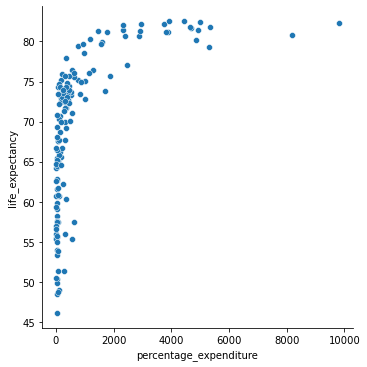

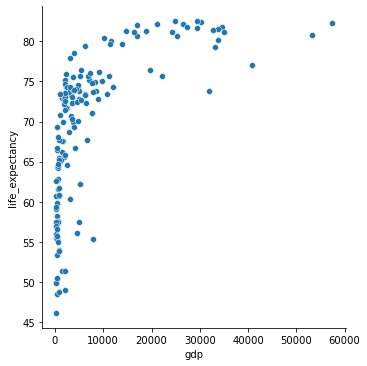

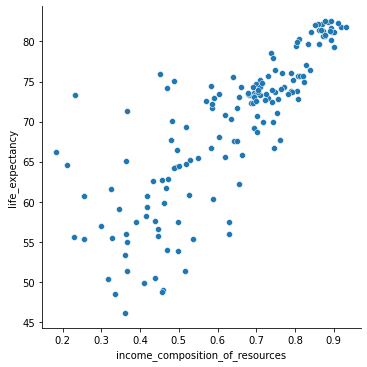

In [9]:
sns.relplot(x= "percentage_expenditure", y="life_expectancy", data=df)
sns.relplot(x="gdp", y="life_expectancy", data=df)
sns.relplot(x="income_composition_of_resources", y="life_expectancy", data=df)

**Interpretation and Conclusions**<br>

With a coefficient of determination of 0.6779, the multiple linear regression shows that percentage expenditure on health, income composition of resources, and GDP account for a high percentage of the variance of life expectancy. We plotted the scatter plots of each predictor variable with life expectancy to show how the graphs share an increasing nature. 

Percentage expenditure and GDP have a similar relationship, where life expectancy increases while the two predictor variables stay close to 0, and then the data starts to curve when the percentage expenditure reaches about 1000 and GDP reaches about 75000. This relationship suggests that life expectancy varies significantly (between 46 and 72) when percentage expenditure is low (between 0% and 1000%); however, when a country spends more than 1000% of GDP per capita on health, the life expectancy is consisitantly between 72 and 83 years. Similarly, when a country has a GDP per capita between 0 and 75000 US dollars, their life expectancy ranges between 46 and 72; however, when a country has a GDP per capita higher than 75000 US dollars, the life expectancy is pretty consistantly between 72 and 83 years.


The plot of income composition of resources and GDP shows higher variance and a more linear relationship. The data has high variance between 0 and 0.65 of Human Development Index in terms of income composition of resources and between 42 and 72 life expectancy; however, the data becomes more clustered with less error as income composition of resources is higher than 0.65 and life expectance is higher than 72. 

In a real world application, this finding suggests that the GDP of a country and the amount of money that country chooses to allocate to healthcare can be used to accurately predict the average life expectancy of that country. This makes sense, as the more money a country has and the more of this money they put towards health, the better quality and quantity healthcare workers, facilities, and resources. This makes it so that ill people are able to easily attain the treatment they need, thus increasing the overall live expectancy. The variance between 46 and 72 of life expectancy on all three graphs when a country spent little on healthcare are likely caused by incurable illnesses or other physical attributes of the country like size, population, and climate, rather than to the economic factors we explored.

# Evaluation of Significance
**Bootstrapping Hypothesis Test on Multiple Linear Regression**

Observed slope:   0.0004132
Bootstrapped CI: [-0.00071765  0.00123863]


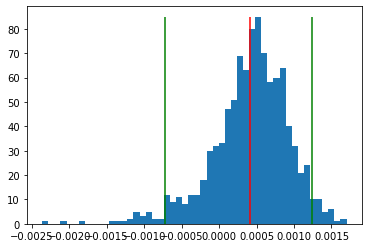

In [10]:
real_slope = multireg.coef_[0]
n_bootstrap = 1000
bootstrap_slopes = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    resampled_data = df.sample(n=len(df), replace=True)
    resampled_model = LinearRegression().fit(resampled_data[["percentage_expenditure", "income_composition_of_resources", "gdp"]], resampled_data["life_expectancy"])
    
    bootstrap_slopes[i] = resampled_model.coef_[0]
    
print(f'Observed slope:  {real_slope: 0.7f}')
print(f'Bootstrapped CI: {np.quantile(bootstrap_slopes, q=[0.025, 0.975])}')

binsizes, _, _ = plt.hist(bootstrap_slopes, bins=50)
plt.vlines(real_slope, ymin=0, ymax=np.max(binsizes), color='red')
plt.vlines(np.quantile(bootstrap_slopes, q=[0.025])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.vlines(np.quantile(bootstrap_slopes, q=[0.975])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.show()

**Interpretation and Conclusions**

We performed a boostrap resampling hypothesis test on the multiple linear regression of percentage expenditure on health, income composition of resources, and gdp as predictors of life expectancy. We took 100 different samples of our data with replacement and found a confidence interval of [-0.0007416, 0.00129752]. Since our observed slope was 0.0004132, our slope falls within our confidence interval. This proves that our observed pattern is robust.

# Limitations 
What are the limitations of your study? What are the biases in your data or assumptions of your analyses that specifically affect the conclusions you're able to draw? <br>

Limitations: only 173 countries our of 195; mostly developing countries; could use variables on some rating of the quality of schooling and the number of hospitals per capita; confounding variables that affect life expectancy such as quality of living, political climate, war status, genetics, etc. <br>

Biases: developing countries have less data on health, inherent bias in declaring a country developed or undeveloped <br>

# Source Code

Github link: https://github.com/milan-patlikh/info-2950

# Acknowledgments

Software Packages: Pandas, Numpy, Matplotlib, Seaborn<br>

Homework 6 question 4 solutions from Maria (TA)<br>
Homeworks 4-7<br>
Lectures 10-19<br>

Dataset Source: https://www.kaggle.com/kumarajarshi/life-expectancy-who <br>

Original Data Sources: Global Health Observatory (GHO) data repository under the World Health Organization (WHO); the United Nations data repository<br>

Consulted with TAs Maria and Sam in office hours.<br>

We did not consult any stack overflow questions, other classes, or people outside of each other, Sam, and Maria.

Additional sources used to aid the writing of conclusions: <br>
https://towardsdatascience.com/how-different-factors-have-an-influence-on-your-life-expectancy-7b807b04f33e <br>

# Questions for Reviewers

Do we have enough summary statistics? ("Use summary functions like mean and standard deviation along with visual displays like scatter plots and histograms to describe data")

We plan to further explain our limitations sections, but do you think we have enough limitations and biases? If not, do you have any suggestions for things we could think about when developing more?